<a href="https://colab.research.google.com/github/SerhiiAndreiko/HW_DATA_12/blob/main/HW_DATA_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install googletrans

In [1]:
!pip install deep-translator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 891.6 kB/s eta 0:00:00


In [30]:
from deep_translator import GoogleTranslator
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
from googletrans import Translator

In [31]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
nlp = spacy.load('en_core_web_sm')
text = 'The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering. Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station. Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions. She had the honor of being chosen as the Return to Flight vehicle after both the Challenger and Columbia accidents. Discovery was the first shuttle to fly with the redesigned SRBs, a result of the Challenger accident, and the first shuttle to fly with the Phase II and Block I SSME. Discovery also carried the Hubble Space Telescope to orbit and performed two of the five servicing missions to the observatory. She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related mission. In addition, Discovery was vital to the construction of the International Space Station (ISS); she flew thirteen of the thirty-seven total missions flown to the station by a U.S. Space Shuttle. She was the first orbiter to dock to the ISS, and the first to perform an exchange of a resident crew. Under Criterion C, Discovery is significant as a feat of engineering. According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials. The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use, ablative heat shield. Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System. As Hale stated, the Space Shuttle remains “the largest, fastest, winged hypersonic aircraft in history,” having regularly flown at twenty-five times the speed of sound.'


In [33]:
sentences = sent_tokenize(text)

In [35]:
# Remove stopwords and tokenize
stop_words = set(stopwords.words('english'))
words = word_tokenize(text)
filtered_words = [word for word in words if word.lower() not in stop_words]

In [36]:
# Tokenize text using spaCy
doc = nlp(text)
filtered_tokens = [token.text for token in doc if not token.is_stop]


In [37]:
# # Translate text to Ukrainian
# ukrainian_text = GoogleTranslator(source='auto', target='uk').translate(text)


In [38]:
# # Tokenize Ukrainian text
# ukrainian_doc = nlp(ukrainian_text)
# ukrainian_sentences = [sent.text for sent in ukrainian_doc.sents]



In [39]:
# Calculate word frequencies in sentences
word_freq = Counter(filtered_tokens)

In [40]:
# Calculate sentence scores based on word frequencies
sentence_scores = {}
for sentence in sentences:
    sentence_tokens = word_tokenize(sentence)
    for word in sentence_tokens:
        if word.lower() in word_freq:
            if sentence not in sentence_scores:
                sentence_scores[sentence] = word_freq[word.lower()]
            else:
                sentence_scores[sentence] += word_freq[word.lower()]



In [41]:
# Sort sentences by their scores
sorted_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)


In [42]:
# Select top 30% of sentences as summary
select_length = int(len(sentences) * 0.3)
summary = [sentence[0] for sentence in sorted_sentences[:select_length]]

In [46]:
# Translate summary to Ukrainian
ukrainian_summary = [GoogleTranslator(source='auto', target='uk').translate(sentence) for sentence in summary]

# Print Ukrainian summary
print("\nUkrainian Summary:")
for sentence in ukrainian_summary:
    print(sentence)



Ukrainian Summary:
За словами Вейна Хейла, керівника польотів з Космічного центру Джонсона, орбітальний корабель «Спейс Шаттл» являє собою «величезний технологічний стрибок від одноразових ракет і капсул до крилатого, гіперзвукового, вантажного космічного корабля багаторазового використання». Незважаючи на те, що її базова конструкція відповідала стандартній конструкції літака, вона використовувала передові матеріали, які мінімізували її вагу для цілей перевезення вантажу та мали низький коефіцієнт теплового розширення, що забезпечило стабільну основу для матеріалів її системи теплового захисту (TPS).
Як заявив Хейл, космічний шаттл залишається «найбільшим, найшвидшим, крилатим гіперзвуковим літальним апаратом в історії», який регулярно літав зі швидкістю, що у двадцять п’ять разів перевищує швидкість звуку.
Враховуючи свій перший рейс (запущений 30 серпня 1984 року), «Діскавері» літав у космос тридцять дев’ять разів, більше ніж будь-який з інших чотирьох орбітальних кораблів; вона та

In [44]:

# Print summary
for sentence in sentences:
    if sentence in summary:
        print(sentence)

Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station.
Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions.
According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials.
As Hale stated, the Space Shuttle remains “the largest, fastest, winged hypersonic aircraft in history,” having regularly flown 

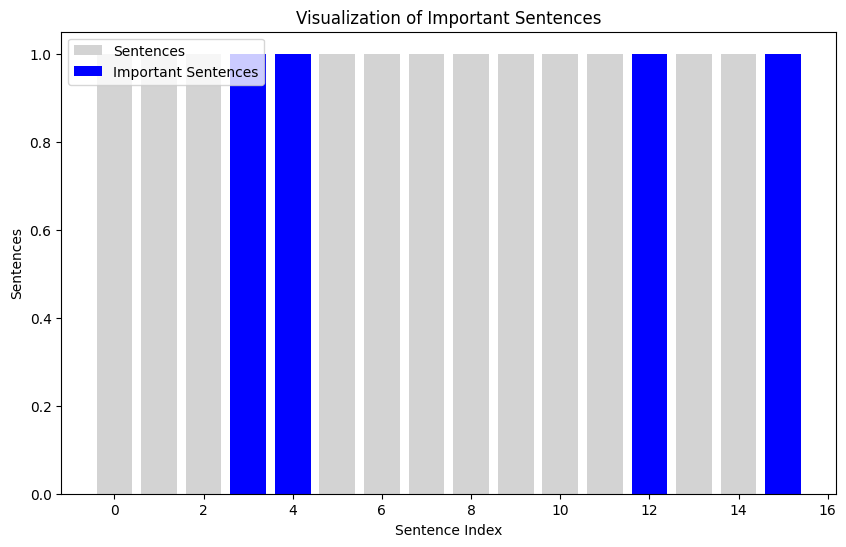

In [45]:
import matplotlib.pyplot as plt

# Create list to store indices of important sentences
important_indices = [i for i, sentence in enumerate(sentences) if sentence in summary]

# Create plot
plt.figure(figsize=(10, 6))

# Plot all sentences
plt.bar(range(len(sentences)), [1] * len(sentences), color='lightgrey', label='Sentences')

# Plot important sentences
plt.bar(important_indices, [1] * len(important_indices), color='blue', label='Important Sentences')

plt.xlabel('Sentence Index')
plt.ylabel('Sentences')
plt.title('Visualization of Important Sentences')
plt.legend()
plt.show()
